In [1]:
from gensim.models import LdaModel
import pickle as pkl
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud 
from matplotlib import pyplot as plt
import pingouin as pg

/home/mashrekur/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/mashrekur/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
# Optimal number of topics
nTopics = 45

In [3]:
# Define colors to associate with each topic
custom_colors = {
 'burlywood': '#DEB887',
 'chocolate': '#D2691E',
 'crimson': '#DC143C',
 'darkgreen': '#006400',
 'darkorange': '#FF8C00',
 'darkslategrey': '#2F4F4F',
 'deepskyblue': '#00BFFF',
 'dimgray': '#696969',
 'firebrick': '#B22222',
 'gold': '#FFD700',
 'goldenrod':'#DAA520',
 'lawngreen':'#7CFC00',
 'rosybrown':'#BC8F8F',
 'mediumslateblue':'#7B68EE',
 'mediumvioletred': '#C71585',
 'orangered': '#FF4500',
 'orchid': '#DA70D6',
 'royalblue': '#4169E1',
 'slateblue': '#6A5ACD',
 'springgreen': '#00FF7F',
 'steelblue': '#4682B4',
 'teal': '#008080',
 'turquoise': '#40E0D0',
 'chamoisee': '#A0785A',
 'blueviolet': '#8A2BE2',
 'yellowgreen': '#9ACD32',
 'cadmiumred': '#E30022',
 'royalblue': '#4169E1',
 'americanrose':  '#FF033E',
 'asparagus': '#87A96B',
 'coral':'#FF7F50',
 'magenta':'#FF00FF',
 'cadet':'#536872',
 'navy':'#000080',
 'bondiblue':'#0095B6',
 'blue':'#0000FF',
 'boysenberry':'#873260',
 'khaki':'#F0E68C',
 'cgblue':'#007AA5',
#  'linen':'#FAF0E6',
 'byzantine':'#BD33A4',
 'palevioletred':'#DB7093',
 'sienna':'#A0522D',
 'mediumspringgreen':'#00FA9A',
 'indianred':'#CD5C5C',
 'tomato': '#FF6347',
 'darkcyan': '#008B8B',
}

# turn into a list
colorlist = []
for i, color in enumerate(custom_colors.values()):
    colorlist.append(tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))
    colorlist[i] = (colorlist[i][0] / 256, colorlist[i][1] / 256, colorlist[i][2] / 256)

In [4]:
# Define topic names
topic_names = [
'Water Quality',
'Sediment Transport',
'Wastewater Treatment',
'Flood Risk & Assessment',
'Hydrogeology',
'Coastal Hydrology', 
'River Flow',
'Wetland & Ecology',
'Runoff Quality',
'Rainfall-Runoff',
'Urban Drainage',
'Systems Hydrology',
'Surface-GW Interactions',
'Irrigation Water Management',
'Drought & Water Scarcity',
'Climate Change Impacts',
'Gauging & Monitoring',
'Forecasting',
'Glaciology',
'Salinity',
'Peatlands Mapping & Monitoring',
'Spatial Variability',
'Land Surface Flux',
'Solute Transport',
'Water Resources Management',
'Numerical Modeling',
'Hydrochemistry',
'Pollutant Removal',
'Groundwater Recharge',
'Uncertainty',
'Land Cover',
'Modeling & Calibration',
'Soil Moisture',
'Water Storage & Budgeting',
'Aquifers & Abstraction',
'Microbiology',
'Streamflow',
'Erosion',
'Dynamic Processes',
'Temporal Variability',
'Spatial Variability of Precipitation',
'Rainfall Intensity & Measurement',
'Watershed Hydrology',
'Hydraulics',
'Quantitative Analysis',
]

# Load Data

In [5]:
# Load model
lda_model = LdaModel.load(f'trained_models/trained_lda_model_new_{nTopics}')

In [6]:
# Load topic distributions
topic_distributions = np.load(f'data/topic_distributions_broad_{lda_model.num_topics}.npy')

In [7]:
# Load raw corpus dataframe
with open('data/raw_corpus_broad.pkl', 'rb') as f:
    corpus_df = pkl.load(f)

/home/mashrekur/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/home/mashrekur/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [8]:
# Pull topics
topics = lda_model.show_topics(formatted=False, num_topics=nTopics, num_words=20)

# Create WordClouds and Trend Plots

In [9]:
# calculate time series
years = np.unique(corpus_df['Year'])
topic_distributions_by_year = np.zeros([len(years), lda_model.num_topics])
for y, year in enumerate(years):
    hm_year = topic_distributions[corpus_df['Year'] == year,:]
    topic_distributions_by_year[y,:] = np.sum(hm_year, axis=0) / np.sum(hm_year)

In [34]:
y_arr = np.array(range(0,30,1))

pg.corr(y_arr, topic_distributions_by_year[:,1])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,30,-0.567198,"[-0.77, -0.26]",0.321714,0.271471,0.001081,36.977,0.923578


In [33]:
len(y_arr)

29

Water Quality
          n         r          CI95%       r2    adj_r2     p-val   BF10  \
pearson  30  0.081488  [-0.29, 0.43]  0.00664 -0.066942  0.668596  0.248   

            power  
pearson  0.070961  
Sediment Transport
          n         r           CI95%        r2    adj_r2     p-val    BF10  \
pearson  30 -0.567198  [-0.77, -0.26]  0.321714  0.271471  0.001081  36.977   

            power  
pearson  0.923578  
Wastewater Treatment
          n         r           CI95%       r2   adj_r2    p-val   BF10  \
pearson  30 -0.427609  [-0.68, -0.08]  0.18285  0.12232  0.01842  3.216   

            power  
pearson  0.673078  
Flood Risk & Assessment
          n         r         CI95%        r2    adj_r2     p-val     BF10  \
pearson  30  0.659894  [0.39, 0.82]  0.435459  0.393642  0.000073  409.149   

            power  
pearson  0.986563  
Hydrogeology
          n         r           CI95%        r2    adj_r2         p-val  \
pearson  30 -0.883534  [-0.94, -0.77]  0.780633  0.764

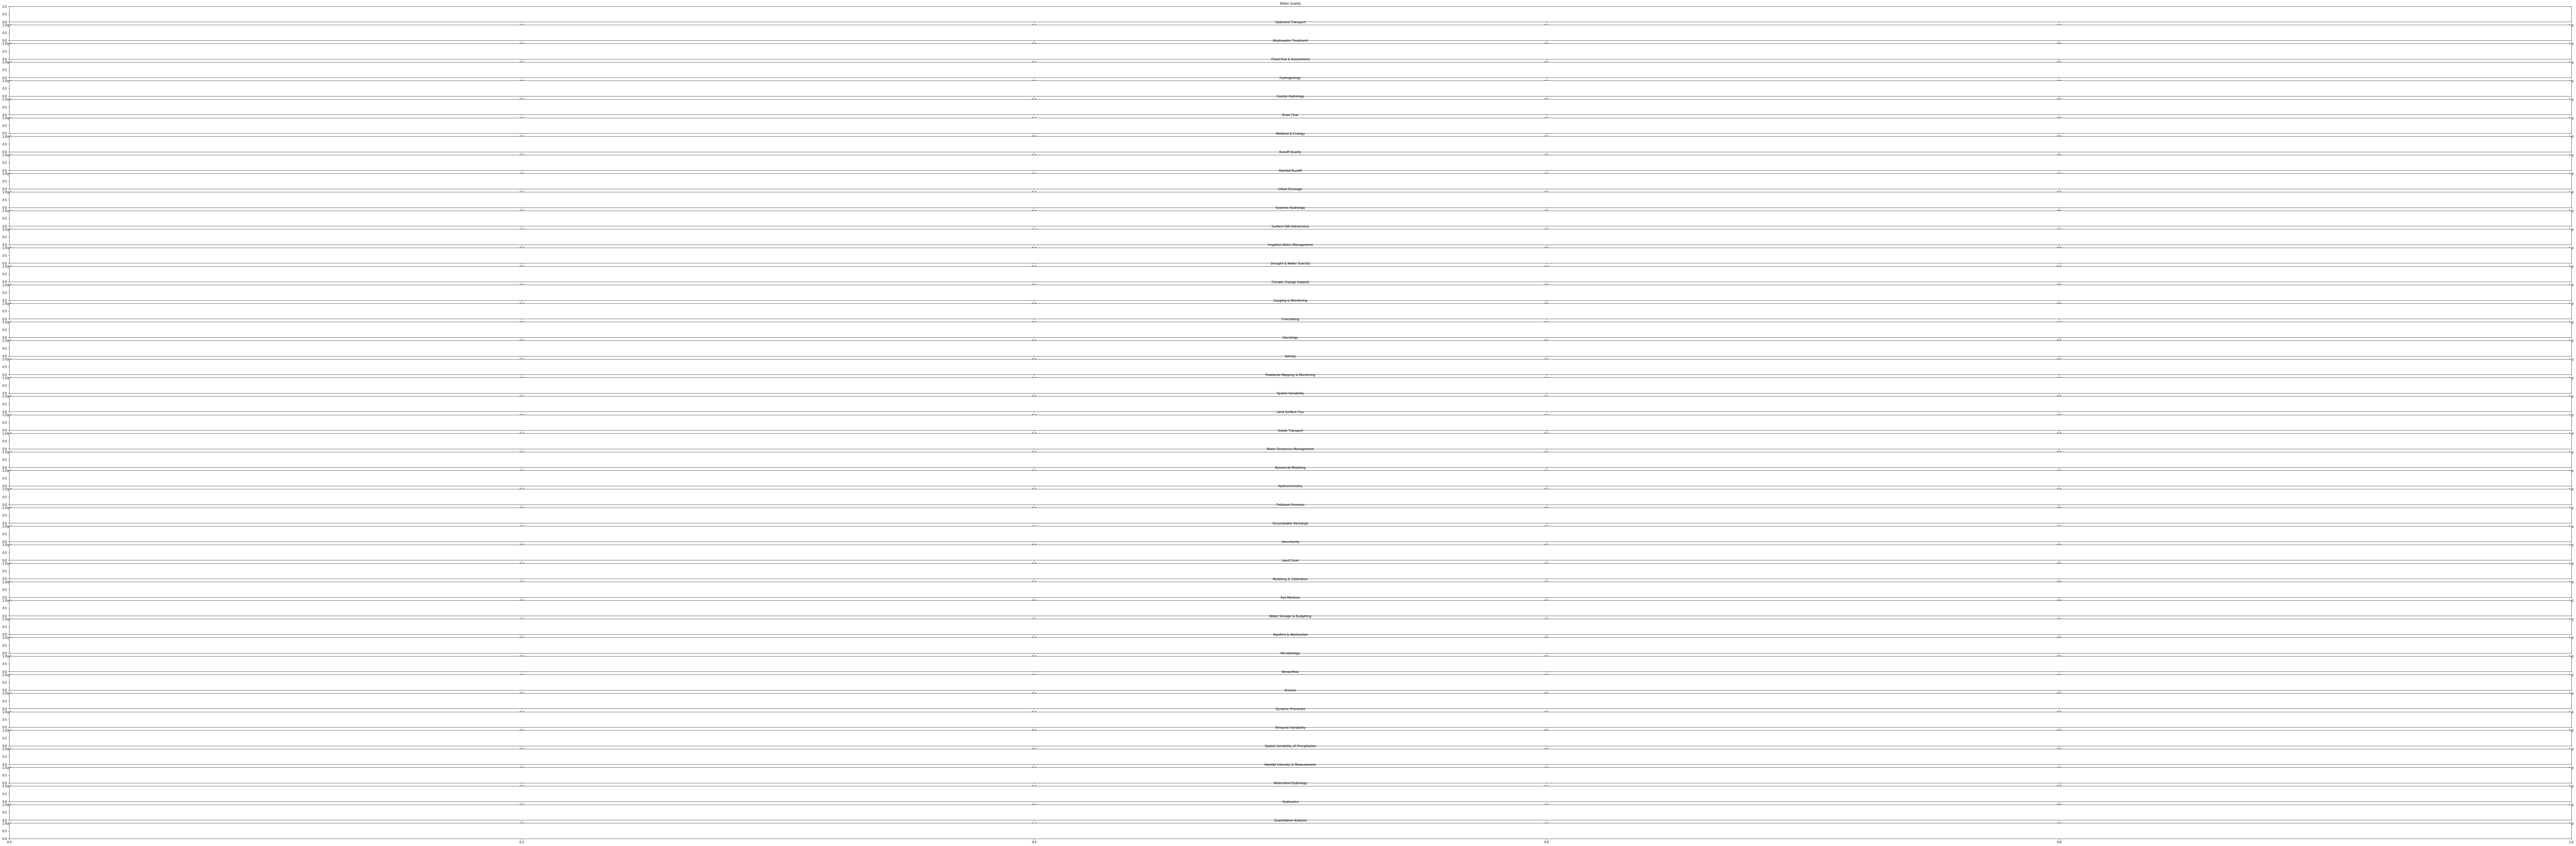

In [44]:
fig = plt.figure(figsize=(150,50), facecolor='white')
# plt.title('Mean Shannon Diversity Per Journal Per Year', fontsize = 400)

# plot numbering starts at 1, not 0
plot_number = 1

for t, topic in enumerate(topic_names):

    ax = fig.add_subplot(45, 1, plot_number) #, sharex = ax

    x = pg.corr(y_arr, topic_distributions_by_year[:,t], ax = ax)
    ax.set_title(topic, size = 10)
    print(topic)
    print(x)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1


In [10]:
# create wordclouds
stop_words = stopwords.words('english')
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3500,
                  height=3500,
                  max_words=15,
                  color_func=lambda *args, **kwargs: colorlist[t],
                  prefer_horizontal=1.0)

In [ ]:
# Plot wordclouds and scaled time series
fig = plt.figure(figsize=(12, 3*nTopics))
gs = fig.add_gridspec(nTopics,3)
for t in range(nTopics):
    
    # plot time series
    ax1 = fig.add_subplot(gs[t, 1:])
    ax1.plot(years, topic_distributions_by_year[:,t], color=list(custom_colors.values())[t], linewidth=8)
    ax1.set_title(topic_names[t])
    ax1.set_xticks(years[4::5])
    ax1.set_xlim(0,28)
    ax1.set_ylabel('Popularity')
    ax1.grid()
    
    # plot wordclouds
    ax0 = fig.add_subplot(gs[t, 0])
    topic_words = dict(topics[t][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=1500)
    ax0.imshow(cloud)
    ax0.axis('off')
    
fig.tight_layout()

# Save figure
plt.savefig('figures/wordclouds_and_trends_broad.png')

In [ ]:
# Plot relative time series
fig = plt.figure(figsize=(26,10))
gs = fig.add_gridspec(1,4)

ax1 = fig.add_subplot(gs[0, :3])
for i in range(lda_model.num_topics):
    r, g, b = colorlist[i] 
    pltcolor = (r / 255., g / 255., b / 255.)
    ax1.plot(years, topic_distributions_by_year[:,i], 
             c=pltcolor, linewidth=3, label=topic_names[i])
ax1.set_xticks(years[::5])
ax1.set_xlim([0, 28])
ax1.set_ylim([0, 0.10])
ax1.set_ylabel('Popularity', fontsize=20)
ax1.set_title('Relative Popularity of Topics', fontsize=28)
ax1.grid()

ax0 = fig.add_subplot(gs[0, 3])
for i in range(lda_model.num_topics):
    r, g, b = colorlist[i] 
    pltcolor = (r / 255., g / 255., b / 255.)
    ax0.plot(years, topic_distributions_by_year[:,i], 
             c=pltcolor, linewidth=3, label=topic_names[i])
ax0.set_xticks([])
ax0.set_yticks([])
ax0.legend(loc='best', shadow=True, fancybox = True)
for i in range(lda_model.num_topics):
    r, g, b = colorlist[i] 
    pltcolor = (r / 255., g / 255., b / 255.)
    ax0.plot(years, topic_distributions_by_year[:,i], 
             c='w', linewidth=6, label=topic_names[i])

# Save figure
plt.savefig('figures/relative_topic_trends_broad.png')

In [ ]:
# Plot relative time series
fig = plt.figure(figsize=(26, 12))
gs = fig.add_gridspec(1,4)

ax1 = fig.add_subplot(gs[0, :3])
ax1.stackplot(years, topic_distributions_by_year.transpose(),labels=topic_names, colors=list(custom_colors.values()))
# ax1.legend(topic_names, loc='center right', shadow=True)
ax1.set_xticks(years[::5])
ax1.set_xlim([years[0], 28])
ax1.set_ylim(0, 1)
ax1.set_ylabel('Popularity', fontsize=16)
ax1.set_title('Relative Popularity of Topics', fontsize=22)
ax1.grid()

ax0 = fig.add_subplot(gs[0, 3])
ax0.stackplot(years, topic_distributions_by_year.transpose(),labels=topic_names, colors=list(custom_colors.values()))
ax0.legend(topic_names, loc='center right', shadow=True, fancybox = True)
ax0.axis('off')

# Save figure
plt.savefig('figures/stackarea_relative_topics_broad.png')

In [ ]:
popularity_df = pd.DataFrame(topic_distributions_by_year.transpose())

In [ ]:
#calculate change in popularity
def pop_calc(s):
    perc_change = ((popularity_df[28][s] - popularity_df[0][s])/ popularity_df[0][s]) * 100
    return perc_change

In [ ]:
for t,topic in enumerate(topic_names):
    print(topic, pop_calc(t))